# Predicting Heart Disease

![img](./Images/mayo_clinic.jpeg)

Author: Xiaohua Su

Date: May 17th, 2022

<div class="alert alert-block alert-danger">
<b>Danger:</b> In order to be able to run this notebook successfully, you must have at minimun 32 Gb of RAM or you run the risk of crashing your computer. This notebook was created on a i7-11800H cpu, and 32GB RAM laptop.
</div>

# Overview

As of 2020, heart disease is the leading cause of death in the US, with the disease claiming close to 700,000 that year. It is the leading cause of death regardless of gender and for most race/ethnicity. This disease can lead to early death in individuals, increase medical visits and a lost of productivity in our economy. As such, it is important to try to address this. My project aims to help build a predictive model for heart disease. By being able to predict whether a patient has heart disease or not, this can be used in hospital to flag doctors to discuss way to manage this disease and prevent early death and potentially slow/mitigate the disease progression.

# Problem

With how prevalent heart disease is in the nation, it is important for doctors to discuss with their patients about early prevention. In order to do this, doctors would need to know more about a patient’s history in order to diagnose them with having heart disease, potentially requiring blood work and other lab work in addition. Getting the results from the blood work usually happens after the patient’s is already out of the doctor’s office. Calls will then be made to discuss these results and potential follow-up appointments will be made.

Our model aims to predict whether a patient, who comes into a doctor’s office/hospital, has heart disease. By being able to predict if the patient has heart disease or not, we can then flag this patient for the doctor electronically. Instead of having to waiting for a phone call for a discussion on, that may not be between the patient and doctor, conversation between the doctor and patient about managing heart disease can begin. This flagging can help start the conversation between the doctor and patient about early prevention steps that can be made and can help lead the doctor in asking certain questions for further verification and testing. By diagnosing it earlier, you can help slow the disease progression, keeping them healthier longer.

# Data

The data was taken from the [CDC's 2020 Behavorial Risk Factor Surveillance System](https://www.cdc.gov/brfss/annual_data/annual_2020.html) (BRFSS).Due to how large the data is, this data was not uploaded to the GitHub but can be found where the data was taken underneath the data files section.The heart disease dataset was created from that 2020 survey and can be found in this repository's [data](https://github.com/xiaohua-su/Heart_Disease/tree/main/Data) folder.

It is a survey data performed between 2020 and 2021 from the CDC. This dataset comprised 400,000 responses and had responses from the 50 states plus DC, Puerto Rico and Guam. This survey is used to monitor people's health-behavior, chronic health conditions, and use of services to help manage their disease.The data contains information of the individual such as `race` and `gender` that we did not include in the heart disease dataset to avoid these biases in our models.A new column was created as the data does not specifically have a column called heart disease but instead had two columns called `cvdinfr4` and `cvdcrhd4` that corresponded with whether the individual was ever told/diagnose with having a heart attack and told that they had coronary heart disease respectively.Both questions, get at the issue of heart disease. It is important to note that while both heart attack and coronary artery disease are considered part of heart disease, they are not the only condition in this category. There are other conditions such as congenital heart issues, and rhythm issue that fall under heart disease that are not captured in this dataset.

# How to run notebook

The [environment.yml](./environment.yml) file is the environment that was used to run this notebook, [EDA notebook](Heart_Disease_EDA.ipynb) and the streamlit app. This notebook requires scipy version 1.5.3 in order to run. When you install the environment into your local, it is possible that scipy updates to a newer version due to streamlit/phik and will need to downgrade it in order for sklearn to operate properly. If you have a MAC unfortunately you'll need to figure out what MAC specific dependencies will be required.

# Imports and Loading in Data

Most of the data cleaning of the dataset used in this notebook and exploration was performed on a different notebook. This notebook can be found [here](Heart_Disease_EDA.ipynb).

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import BayesianRidge
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImPipeline

from model import *
from get_features import *
import joblib

# Warnings
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

The model library was taken from Flatiron's Workflow with pipelines lecture. Adjustments and addition of a method was added into the model.py file. The get_feature file was taken from [Haupt J](https://johaupt.github.io/blog/columnTransformer_feature_names.html).

In [4]:
#show all columns
pd.set_option('display.max_columns', None)

In [5]:
heart_df = pd.read_csv('./Data/heart_df.csv')

In [6]:
heart_df

,state,general_health,physical_health,mental_health,health_insurance,health_care_doctors,no_doc_bc_cost,last_checkup,excercise_30,sleep,stroke,asthma,skin_cancer,other_cancer,copd_type_issue,arthritis_anyform,depressive_disorder,kidney_disease,diabetes,education_lvl,rent_own,employment_status,income_level,weight_kg,height_m,difficulty_walking,smoke100_lifetime,smokeless_tobacco_products,alcohol_consumption_30,high_risk_situations,ecigaret,heart_disease
0,1.0,2.0,3.0,30.0,2.0,3.0,1.0,4.0,1.0,5.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,6.0,1.0,4.0,1.0,48.0,170.0,2.0,1.0,3.0,0.0,2.0,1.0,0.0
1,1.0,3.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,7.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,3.0,6.0,1.0,7.0,99.0,NaN,163.0,2.0,NaN,NaN,NaN,NaN,NaN,0.0
2,1.0,3.0,0.0,0.0,1.0,1.0,2.0,1.0,1.0,7.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,3.0,5.0,1.0,7.0,7.0,NaN,173.0,2.0,2.0,3.0,0.0,2.0,2.0,0.0
3,1.0,2.0,0.0,0.0,1.0,1.0,2.0,1.0,1.0,7.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,6.0,2.0,7.0,NaN,57.0,168.0,2.0,2.0,3.0,0.0,2.0,2.0,0.0
4,1.0,4.0,20.0,30.0,1.0,1.0,2.0,2.0,1.0,8.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0,4.0,3.0,8.0,5.0,82.0,175.0,2.0,1.0,1.0,0.0,2.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331523,72.0,3.0,0.0,0.0,2.0,1.0,2.0,2.0,1.0,6.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,3.0,5.0,1.0,1.0,99.0,55.0,150.0,2.0,2.0,3.0,0.0,2.0,NaN,0.0
331524,72.0,3.0,0.0,0.0,1.0,1.0,2.0,3.0,2.0,12.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,2.0,5.0,4.0,76.0,152.0,2.0,2.0,3.0,0.0,2.0,NaN,0.0
331525,72.0,3.0,0.0,0.0,1.0,1.0,2.0,2.0,1.0,8.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,4.0,1.0,5.0,1.0,72.0,124.0,2.0,2.0,3.0,0.0,2.0,NaN,0.0
331526,72.0,3.0,0.0,0.0,1.0,1.0,2.0,1.0,1.0,6.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,6.0,1.0,1.0,99.0,80.0,173.0,2.0,7.0,3.0,4.0,2.0,NaN,0.0


In [7]:
heart_df

,state,general_health,physical_health,mental_health,health_insurance,health_care_doctors,no_doc_bc_cost,last_checkup,excercise_30,sleep,stroke,asthma,skin_cancer,other_cancer,copd_type_issue,arthritis_anyform,depressive_disorder,kidney_disease,diabetes,education_lvl,rent_own,employment_status,income_level,weight_kg,height_m,difficulty_walking,smoke100_lifetime,smokeless_tobacco_products,alcohol_consumption_30,high_risk_situations,ecigaret,heart_disease
0,1.0,2.0,3.0,30.0,2.0,3.0,1.0,4.0,1.0,5.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,6.0,1.0,4.0,1.0,48.0,170.0,2.0,1.0,3.0,0.0,2.0,1.0,0.0
1,1.0,3.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,7.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,3.0,6.0,1.0,7.0,99.0,NaN,163.0,2.0,NaN,NaN,NaN,NaN,NaN,0.0
2,1.0,3.0,0.0,0.0,1.0,1.0,2.0,1.0,1.0,7.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,3.0,5.0,1.0,7.0,7.0,NaN,173.0,2.0,2.0,3.0,0.0,2.0,2.0,0.0
3,1.0,2.0,0.0,0.0,1.0,1.0,2.0,1.0,1.0,7.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,6.0,2.0,7.0,NaN,57.0,168.0,2.0,2.0,3.0,0.0,2.0,2.0,0.0
4,1.0,4.0,20.0,30.0,1.0,1.0,2.0,2.0,1.0,8.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0,4.0,3.0,8.0,5.0,82.0,175.0,2.0,1.0,1.0,0.0,2.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331523,72.0,3.0,0.0,0.0,2.0,1.0,2.0,2.0,1.0,6.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,3.0,5.0,1.0,1.0,99.0,55.0,150.0,2.0,2.0,3.0,0.0,2.0,NaN,0.0
331524,72.0,3.0,0.0,0.0,1.0,1.0,2.0,3.0,2.0,12.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,2.0,5.0,4.0,76.0,152.0,2.0,2.0,3.0,0.0,2.0,NaN,0.0
331525,72.0,3.0,0.0,0.0,1.0,1.0,2.0,2.0,1.0,8.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,4.0,1.0,5.0,1.0,72.0,124.0,2.0,2.0,3.0,0.0,2.0,NaN,0.0
331526,72.0,3.0,0.0,0.0,1.0,1.0,2.0,1.0,1.0,6.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,6.0,1.0,1.0,99.0,80.0,173.0,2.0,7.0,3.0,4.0,2.0,NaN,0.0


In [8]:
heart_df.drop(columns = ['education_lvl', 'income_level', 'employment_status', 'rent_own', 'health_care_doctors','no_doc_bc_cost', 'smokeless_tobacco_products', 'high_risk_situations', 'ecigaret', 'state'], inplace = True)

Some of these columns make no sense to have due to where I would want to implement my model. By this I mean typically, some of these questionswill not be asked in a doctor's office because of the way it comes off/will seem like profiling and would have people questioning why are you asking some of these questions when it has nothing to do with their health. In addition to that, `ecigaret` has 34% null values, which is a high percentage and the correlation with the target is really low. Potentially, some information may be loss and it may affect the scoring metric a bit. It can be added back into the modeling at a later point.

In [9]:
X = heart_df.drop(columns = ['heart_disease'])
y = heart_df.heart_disease

# Preprocessing and Model Prep

In [10]:
#train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify = y , random_state = 42)

In [11]:
y_train.value_counts(normalize = True)

0.0    0.915426
1.0    0.084574
Name: heart_disease, dtype: float64

Our target is heavily imbalance. As such I will need to SMOTE and use the imblearn version of pipelines. I will smote up to 25%. SMOTING to 5-% will introduce a too much synthetic data points to our dataset that is also large.

#### Column Transformers

Column transformer Pipelines will be built to prevent data leakage when we are doing cross validation as we need to scale and one-hot-encode our features. Different column transformers will be made as we will see how our model does with different types of features.

In [11]:
X_train

,general_health,physical_health,mental_health,health_insurance,last_checkup,excercise_30,sleep,stroke,asthma,skin_cancer,other_cancer,copd_type_issue,arthritis_anyform,depressive_disorder,kidney_disease,diabetes,weight_kg,height_m,difficulty_walking,smoke100_lifetime,alcohol_consumption_30
248413,1.0,0.0,0.0,1.0,2.0,1.0,6.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,73.0,165.0,2.0,2.0,5.0
91003,3.0,0.0,0.0,1.0,1.0,1.0,6.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,55.0,175.0,2.0,2.0,0.0
148075,1.0,0.0,10.0,1.0,2.0,1.0,6.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,50.0,168.0,2.0,2.0,4.0
273325,3.0,0.0,0.0,2.0,1.0,1.0,8.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,55.0,152.0,2.0,2.0,0.0
193206,1.0,0.0,0.0,1.0,1.0,1.0,8.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,62.0,165.0,2.0,2.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298694,1.0,0.0,0.0,1.0,1.0,1.0,8.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,82.0,168.0,2.0,2.0,30.0
82524,3.0,15.0,0.0,1.0,1.0,2.0,7.0,2.0,2.0,2.0,2.0,NaN,1.0,2.0,2.0,3.0,100.0,160.0,1.0,1.0,0.0
289919,2.0,0.0,0.0,1.0,1.0,1.0,8.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,68.0,168.0,2.0,2.0,2.0
130280,5.0,5.0,5.0,1.0,1.0,1.0,6.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,91.0,175.0,2.0,2.0,0.0


In [12]:
X_train.physical_health.value_counts()

0.0     172226
30.0     15644
2.0      11154
1.0       7804
3.0       6586
5.0       5716
10.0      4157
15.0      3970
7.0       3564
4.0       3368
20.0      2511
14.0      2236
6.0        928
25.0       901
99.0       728
8.0        704
21.0       479
12.0       465
28.0       361
29.0       159
18.0       126
16.0       103
27.0       102
17.0        81
11.0        75
13.0        66
22.0        59
26.0        58
24.0        55
23.0        36
19.0        27
Name: physical_health, dtype: int64

In [13]:
continous = ['physical_health', 'mental_health', 'last_checkup' , 'excercise_30', 'sleep', 'weight_kg', \
               'height_m', 'alcohol_consumption_30']

categorical = list(X.columns.drop(continous))

In [14]:
categorical

['general_health',
 'health_insurance',
 'stroke',
 'asthma',
 'skin_cancer',
 'other_cancer',
 'copd_type_issue',
 'arthritis_anyform',
 'depressive_disorder',
 'kidney_disease',
 'diabetes',
 'difficulty_walking',
 'smoke100_lifetime']

##### Imputer

For the imputing values in my dataset, I decided against SimpleImputer as I determined that imputing the most frequent for my categorical may cause my models to not be able to capture any patterns as well since this dataset is heavily imbalanced. As such, I was left with the KNN imputation that was discussed in my Flatiron class. However, after talking to other students who have used KNN imputation, I decided against it because of how large my dataset is. As such, I looked for alternatives and came upon Multiple Imputation by Chain Equations (MICE) also known as the IterativeImputer in sklearn. It happens to be as robust as the KNN imputation. Because it has to cycle through the entire dataset multiple times, I decided to set the `max_iter` to 5 instead of leaving it at the default of 10 as it would take longer to go through. As a result, I am giving up potentially better prediction and the imputer may not converge for a faster model and have it be less taxing on my computer.

More information on MICE and how it works:

[Sklearn IterativeImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html)
[MICE - stackexchange](https://stats.stackexchange.com/questions/421545/multiple-imputation-by-chained-equations-mice-explained#:~:text=MICE%20is%20a%20multiple%20imputation,are%20missing%20completely%20at%20random)
[Multiple imputation by chained equations](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3074241/)

In [15]:
cat_pipe = Pipeline(steps=[('cat_impute', IterativeImputer(estimator = RandomForestClassifier(random_state=42),
                                                           random_state=42, max_iter = 5)),
                              ('ohe', OneHotEncoder(sparse=False, handle_unknown='ignore'))])
scale_pipe = Pipeline(steps=[('scale_impute', IterativeImputer(estimator = BayesianRidge(),random_state=42)),
                              ('scale', MinMaxScaler())])

In [16]:
#ct for only continous
ct_continous = ColumnTransformer(transformers=[
    ('scale', scale_pipe, continous)
], n_jobs= -2)

#ct for categorical only
ct_categorical = ColumnTransformer(transformers=[
    ('cat', cat_pipe, categorical),
], n_jobs= -2)

#ct with both continous and categorical
ct = ColumnTransformer(transformers=[
    ('cat', cat_pipe, categorical),
    ('scale', scale_pipe, continous)
], n_jobs=-2)

# Models

I decreased the amount folds used in the cross validation from the default of 5 to 3 to speed up the modeling process and have it be less taxing on the computer.

For my modeling process, I will first attempt to run some default models on different parts of the entire dataframe. I want to see how well just the continuous features do in recall performance. Then I will run some initial grid searches before moving on to examine how well the categorical features performs followed by having all the features. If time permits, I would then want to compare the best model found here and compare its performance to a neural network model.

The metric that I will be focusing on for my modeling process is going to be recall. It is important to be able to accurately identify the individual people who have heart disease and not misclassified them as not having heart disease. Mis-classifying them as not having heart disease means that we are missing out on the opportunity to prevent and or slow disease progression. This can have detrimental impact on the person's health and disrupt their life. As such, I will pay close attention to recall. Mis-classifying individuals as having heart disease is not bad per se as it means that the doctor can potentially start talking to the individual on heart health and prevent this disease.

## Dummy Classifier

In [16]:
X_simple = X_train[continous]
y_simple = y_train

X_simple

,physical_health,mental_health,last_checkup,excercise_30,sleep,weight_kg,height_m,alcohol_consumption_30
248413,0.0,0.0,2.0,1.0,6.0,73.0,165.0,5.0
91003,0.0,0.0,1.0,1.0,6.0,55.0,175.0,0.0
148075,0.0,10.0,2.0,1.0,6.0,50.0,168.0,4.0
273325,0.0,0.0,1.0,1.0,8.0,55.0,152.0,0.0
193206,0.0,0.0,1.0,1.0,8.0,62.0,165.0,4.0
...,...,...,...,...,...,...,...,...
298694,0.0,0.0,1.0,1.0,8.0,82.0,168.0,30.0
82524,15.0,0.0,1.0,2.0,7.0,100.0,160.0,0.0
289919,0.0,0.0,1.0,1.0,8.0,68.0,168.0,2.0
130280,5.0,5.0,1.0,1.0,6.0,91.0,175.0,0.0


In [17]:
dummy_simple = ImPipeline(steps=[
    ('ct', ct_continous),
    ('sm', SMOTE(sampling_strategy= 0.25, random_state=1)),
    ('dummy', DummyClassifier(strategy='most_frequent'))
]).fit(X_simple,y_simple)

In [18]:
dummy_info = ModelWithCV(dummy_simple, 'dummy', X_simple, y_simple)

 The recall on the training is 0.0 
 CV Results for `dummy` model:
            0.00000 ± 0.00000 recall
         
 
 


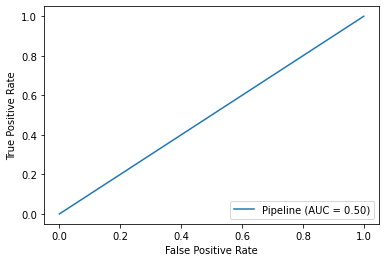

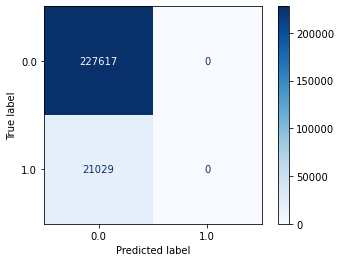

In [19]:
dummy_info.print_summary()

In [20]:
dummy_pca = ImPipeline(steps=[
    ('ct', ct_continous),
    ('pca', PCA()),
    ('dummy', DummyClassifier(strategy='most_frequent'))
]).fit(X_simple, y_simple)

In [21]:
dummy_pca_info = ModelWithCV(dummy_simple, 'dummy', X_simple, y_simple)

 The recall on the training is 0.0 
 CV Results for `dummy` model:
            0.00000 ± 0.00000 recall
         
 
 


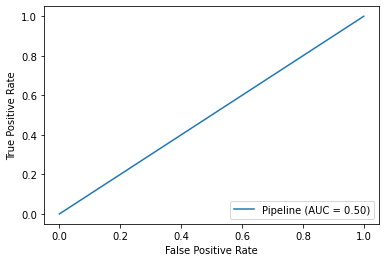

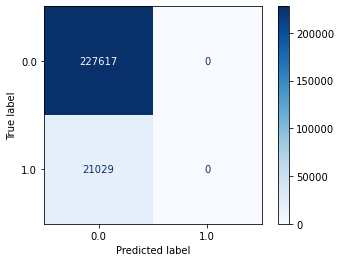

In [22]:
dummy_pca_info.print_summary()

## Simple Model 1 - Logistic Regression

In [23]:
log1 = ImPipeline(steps=[
    ('ct', ct_continous),
    ('sm', SMOTE(sampling_strategy= 0.25, random_state=1)),
    ('log',LogisticRegression(random_state=42))
]).fit(X_simple,y_simple)

In [24]:
log1_info = ModelWithCV(log1, 'log1', X_simple, y_simple)

 The recall on the training is 0.04213229349945313 
 CV Results for `log1` model:
            0.04123 ± 0.00203 recall
         
 
 


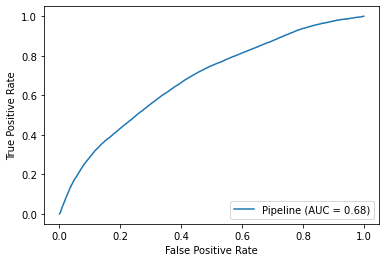

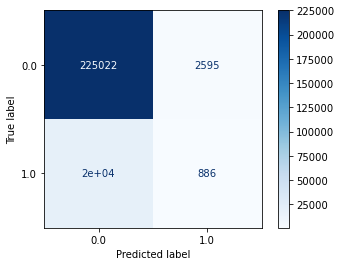

In [25]:
log1_info.print_summary()

The simple logistic regression is only able to perform 4% better than the dummy, which is not great since the recall of the dummy is 0. The ROC-AUC is better than the dummy being at 0.68 compared to 0.50.

In [26]:
log_pca = ImPipeline(steps=[
    ('ct', ct_continous),
    ('sm', SMOTE(sampling_strategy= 0.25, random_state=1)),
    ('pca', PCA()),
    ('log',LogisticRegression(random_state=42))
]).fit(X_simple,y_simple)

In [27]:
log_pca_info = ModelWithCV(log_pca, 'log_pca', X_simple, y_simple)

 The recall on the training is 0.04213229349945313 
 CV Results for `log_pca` model:
            0.04123 ± 0.00203 recall
         
 
 


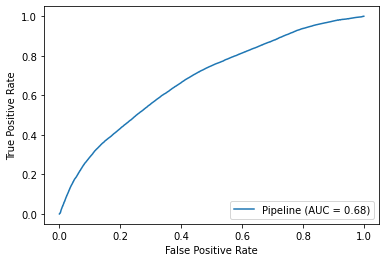

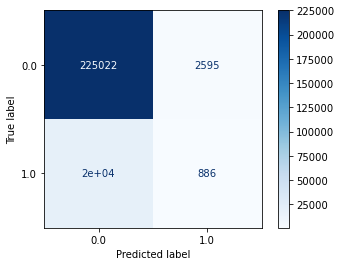

In [28]:
log_pca_info.print_summary()

Performing PCA on the logistic regression did not help with the recall score. The logistic model without pca performed better.

## Simple Model 2 - KNN

In [29]:
knn1 = ImPipeline(steps=[
    ('ct', ct_continous),
    ('sm', SMOTE(sampling_strategy= 0.25, random_state=1)),
    ('knn1',KNeighborsClassifier())
]).fit(X_simple,y_simple)

In [30]:
knn1_info = ModelWithCV(knn1, 'knn', X_simple, y_simple)

 The recall on the training is 0.5204717295163821 
 CV Results for `knn` model:
            0.17509 ± 0.00676 recall
         
 
 


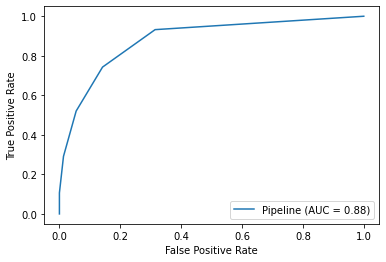

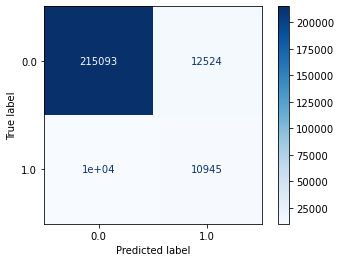

In [31]:
knn1_info.print_summary()

The KNN did much better compared to the logistic regression. It has a recall score of about 0.52 compared to the logistic regression of 0.04. The ROC-AUC is also much better at 0.88 versus 0.68. The model does appear to be potentially overfit as the cross validation (cv) recall came back to be 0.18, while the entire training recall is 0.52.

## Simple Model 3 - Decision Tree

In [32]:
dtree1 = ImPipeline(steps=[
    ('ct', ct_continous),
    ('sm', SMOTE(sampling_strategy=0.25, random_state=1)),
    ('dtree', DecisionTreeClassifier(random_state=42) )
]).fit(X_simple,y_simple)

 The recall on the training is 0.6877169622901708 
 CV Results for `dtree1` model:
            0.14599 ± 0.00541 recall
         
 
 


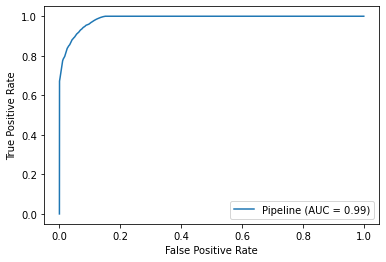

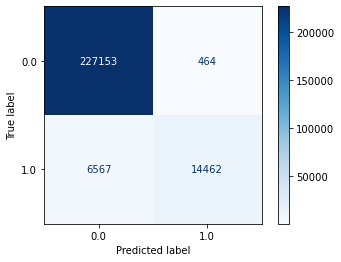

In [33]:
dtree1_info = ModelWithCV(dtree1, 'dtree1', X_simple, y_simple)
dtree1_info.print_summary()

Our decision tree performed much better with a recall score of 0.69, ROC-AUC of 0.99 but with a cv recall of 0.15, suggesting that its overfit. Though, the ROC-AUC being 0.99 indicates that it is more than likely overfit.

In [34]:
X_simple

,physical_health,mental_health,last_checkup,excercise_30,sleep,weight_kg,height_m,alcohol_consumption_30
248413,0.0,0.0,2.0,1.0,6.0,73.0,165.0,5.0
91003,0.0,0.0,1.0,1.0,6.0,55.0,175.0,0.0
148075,0.0,10.0,2.0,1.0,6.0,50.0,168.0,4.0
273325,0.0,0.0,1.0,1.0,8.0,55.0,152.0,0.0
193206,0.0,0.0,1.0,1.0,8.0,62.0,165.0,4.0
...,...,...,...,...,...,...,...,...
298694,0.0,0.0,1.0,1.0,8.0,82.0,168.0,30.0
82524,15.0,0.0,1.0,2.0,7.0,100.0,160.0,0.0
289919,0.0,0.0,1.0,1.0,8.0,68.0,168.0,2.0
130280,5.0,5.0,1.0,1.0,6.0,91.0,175.0,0.0


In [35]:
#rf
rf1 = ImPipeline(steps=[
    ('ct', ct_continous),
    ('sm', SMOTE(sampling_strategy=0.25, random_state=1)),
    ('rf1', RandomForestClassifier(random_state=42) )
]).fit(X_simple,y_simple)

In [36]:
rf1_info = ModelWithCV(rf1, 'rf1', X_simple, y_simple)

 The recall on the training is 0.7133482333919825 
 CV Results for `rf1` model:
            0.06477 ± 0.00134 recall
         
 
 


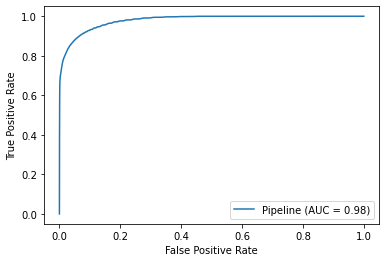

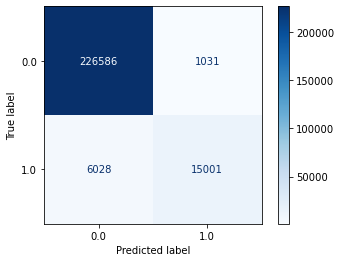

In [37]:
rf1_info.print_summary()

The random forest performed better than the decision tree. It had a recall of 0.71 whereas the decision tree had a recall of 0.69. It's over fit based on the ROC-AUC score being 0.99 while the cv is 0.06.

# Simple Model 4 - XGBoost

In [38]:
xg1 = ImPipeline(steps=[
    ('ct', ct_continous),
    ('sm', SMOTE(sampling_strategy=0.25, random_state=1)),
    ('xg1', XGBClassifier(random_state= 42) )
]).fit(X_simple,y_simple)

 The recall on the training is 0.03086214275524276 
 CV Results for `xg1` model:
            0.02183 ± 0.00273 recall
         
 
 


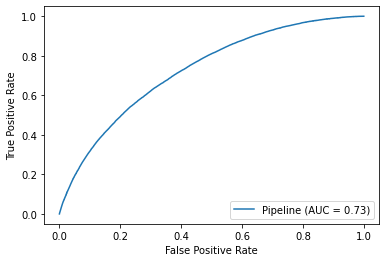

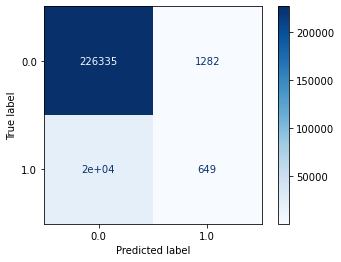

In [39]:
xg1_info = ModelWithCV(xg1, 'xg1', X_simple, y_simple)
xg1_info.print_summary()

The XG Boost model performed the worse out of all the model with a recall of 0.03 which is not ideal. The ROC-AUC score is 0.73 though which is better than the dummy and both the logistic models. It's not overfit based on the cv being close to the training recall at 0.02 but that value is so low that it would be better to just take one of the over fit tree.

# Grid Search on best models

**Due to  decision trees and random forest being prone to overfitting and based on our ROC-AUC it is for me, I added the KNN model to grid search. I understand that if I hit either an upper or lower value in a list of parameters passed that I should continue to grid search to a certain point. But,I will not do so in this case, because I'm not performing a kitchen sink approach and am curious on how well the other data sections performs. As such getting those models in will be my top priority and if time permit and or I am not satisfied with my recall score, then I will return to additional grid searches.**

### KNN

In [40]:
knn_params = {
    'knn1__n_neighbors': [10,20,30],
    'knn1__metric' : ['minkowski', 'euclidean']
}

In [41]:
knn_gs = GridSearchCV(estimator=knn1, param_grid=knn_params, n_jobs=-2, scoring='recall').fit(X_simple,y_simple)

In [42]:
knn_gs.best_estimator_

Pipeline(steps=[('ct',
                 ColumnTransformer(n_jobs=-2,
                                   transformers=[('scale',
                                                  Pipeline(steps=[('scale_impute',
                                                                   IterativeImputer(estimator=BayesianRidge(),
                                                                                    random_state=42)),
                                                                  ('scale',
                                                                   MinMaxScaler())]),
                                                  ['physical_health',
                                                   'mental_health',
                                                   'last_checkup',
                                                   'excercise_30', 'sleep',
                                                   'weight_kg', 'height_m',
                                                   'alco

In [43]:
knn1_tune = ModelWithCV(knn_gs.best_estimator_,'knn1_tune', X_simple, y_simple)

In [44]:
joblib.dump(knn1_tune, './joblib_models/knn1_tune.sav')

['./joblib_models/knn1_tune.sav']

 The recall on the training is 0.3116648437871511 
 CV Results for `knn1_tune` model:
            0.13120 ± 0.00069 recall
         
 
 


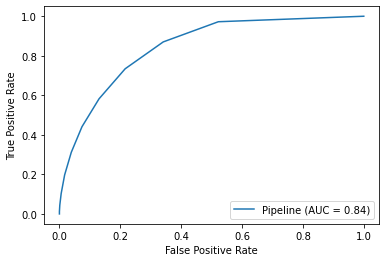

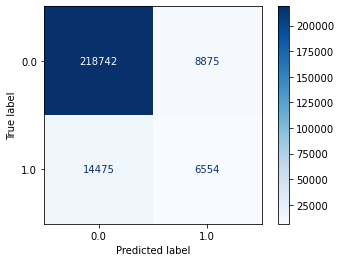

In [45]:
knn1_tune.print_summary()

Not as highly over fit as the default KNN that had a recall of 0.64 and cv recall of 0.18. This model is recall is 0.31 with a cv recall of 0.13, suggesting that it is less overfit. The ROC-AUC is lowered by 0.04.

### Decision Trees

In [46]:
dtree1_params = {
    'dtree__criterion' : ['gini', 'entropy'],
    'dtree__max_depth' : [5,10,20],
    'dtree__min_samples_split' : [1000, 10000, 50000]
}

In [47]:
dtree1_gs = GridSearchCV(estimator=dtree1, param_grid=dtree1_params, n_jobs=-2, scoring='recall',verbose=3).fit(X_simple,y_simple)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done   2 tasks      | elapsed:   12.1s
[Parallel(n_jobs=-2)]: Done  90 out of  90 | elapsed:  1.3min finished


In [48]:
dtree1_gs = joblib.load('./joblib_models/dtree1_gs.sav')

In [49]:
dtree1_tune = ModelWithCV(dtree1_gs.best_estimator_,'dtree1_tune', X_simple, y_simple)

In [50]:
joblib.dump(dtree1_tune, './joblib_models/dtree1_tune.sav')

['./joblib_models/dtree1_tune.sav']

 The recall on the training is 0.0001902135146702173 
 CV Results for `dtree1_tune` model:
            0.00010 ± 0.00013 recall
         
 
 


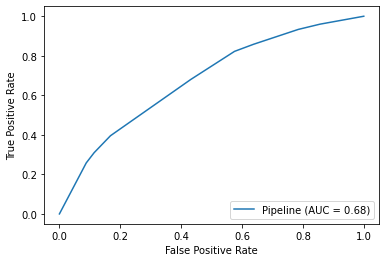

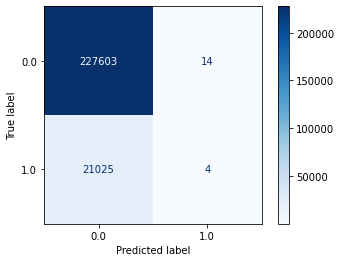

In [51]:
dtree1_tune.print_summary()

This grid search essentially turned returned a recall score that is so close to zero that it is practically zero. It has a recall of 0.0002 and the cv is 0.0001, meaning its not overfit as those two value are close together. The ROC-AUC is better than the dummy but this grid search found a decision that performed worse than the default.

## Random Forest

In [52]:
rf_params = {
    'rf1__n_estimators' : [100,200],
    'rf1__criterion' : ['gini', 'entropy'],
    'rf1__max_depth' : [5,10,20]
}

In [53]:
rf_gs = GridSearchCV(estimator=rf1, param_grid=rf_params, n_jobs=-2,verbose=3, scoring='recall').fit(X_simple,y_simple)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done   2 tasks      | elapsed:   31.6s
[Parallel(n_jobs=-2)]: Done  52 out of  60 | elapsed:  3.2min remaining:   29.8s
[Parallel(n_jobs=-2)]: Done  60 out of  60 | elapsed:  3.5min finished


In [54]:
rf_gs_info = ModelWithCV(rf_gs.best_estimator_, 'rf_gs', X_simple, y_simple)

 The recall on the training is 0.2897427362214085 
 CV Results for `rf_gs` model:
            0.03733 ± 0.00351 recall
         
 
 


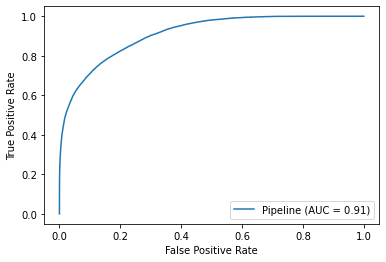

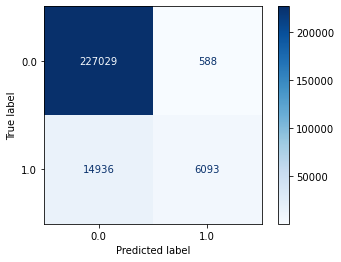

In [56]:
rf_gs_info.print_summary()

Like the decision tree grid search, this random forest grid search's best estimator is worse than the default random forest. Its recall is 0.29, while it's cv recall is 0.04. While it is still not big compared to the default, it still is overfit. The ROC-AUC is still pretty high being at 0.91.

**Discussion**

These recall scores and cv do indicate that these defaults models (KNN, decision tree, random forest) are overfit which is expected as they are prone to being overfit. Not only that but the random forest model is likely over fit. As such, I will now see how well just having categorical features with these algorithms.

# Does only Categorical perform better?

In [57]:
X_categorical = X_train.drop(columns = continous)

In [58]:
y_categorical = y_train

In [59]:
dummy_cate = ImPipeline(steps=[
    ('ct', ct_categorical),
    ('sm', SMOTE(sampling_strategy=0.25, random_state=1)),
    ('dummy', DummyClassifier(strategy='most_frequent'))
]).fit(X_categorical,y_categorical)

In [60]:
dummy_cate_info = ModelWithCV(dummy_cate, 'dummy_cate', X_categorical, y_categorical)

 The recall on the training is 0.0 
 CV Results for `dummy_cate` model:
            0.00000 ± 0.00000 recall
         
 
 


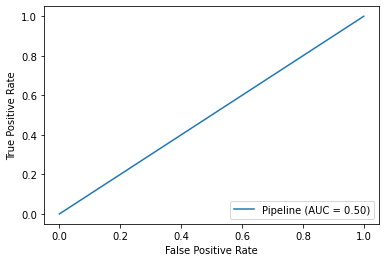

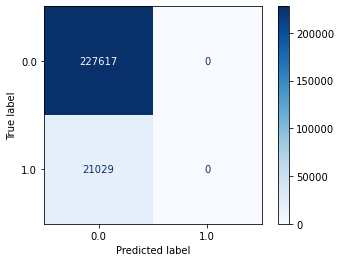

In [61]:
dummy_cate_info.print_summary()

In [62]:
dummy_cate_pca = ImPipeline(steps=[
    ('ct', ct_categorical),
    ('sm', SMOTE(sampling_strategy=0.25, random_state=1)),
    ('pca', PCA()),
    ('dummy', DummyClassifier(strategy='most_frequent'))
]).fit(X_categorical,y_categorical)

In [63]:
dummy_cate_pca_info = ModelWithCV(dummy_cate_pca, 'dummy_cate_pca', X_categorical, y_categorical)

 The recall on the training is 0.0 
 CV Results for `dummy_cate_pca` model:
            0.00000 ± 0.00000 recall
         
 
 


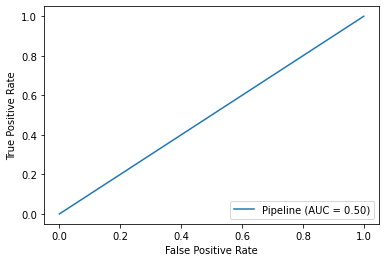

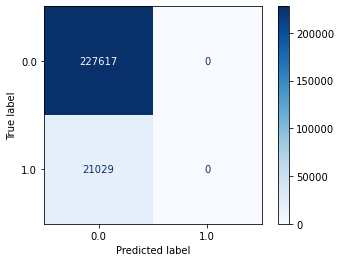

In [64]:
dummy_cate_pca_info.print_summary()

#### Logistic Regression

In [65]:
log_cate = ImPipeline(steps=[
    ('ct', ct_categorical),
    ('sm', SMOTE(sampling_strategy= 0.25, random_state=1)),
    ('log',LogisticRegression(random_state=42))
]).fit(X_categorical,y_categorical)

In [66]:
log_cate_info = ModelWithCV(log_cate, 'log_cate', X_categorical, y_categorical)

 The recall on the training is 0.28826858148271434 
 CV Results for `log_cate` model:
            0.28732 ± 0.00423 recall
         
 
 


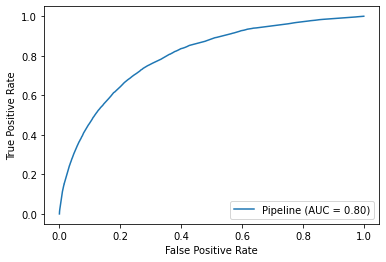

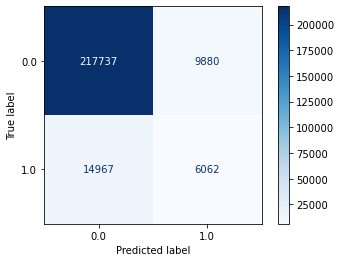

In [68]:
log_cate_info.print_summary()

The logistic regression performed better than the dummy. Though not surprising as the dummy's recall is 0.00. The logistic regression had a recall of 0.29 and a ROC-AUC of 0.80 which is better than the dummy's of 0.50.

In [69]:
log_pca_cate = ImPipeline(steps=[
    ('ct', ct_categorical),
    ('sm', SMOTE(sampling_strategy= 0.25, random_state=1)),
    ('pca_cate', PCA()),
    ('log_cate',LogisticRegression(random_state=42))
]).fit(X_categorical,y_categorical)

In [70]:
log_pca_cate_info = ModelWithCV(log_pca_cate, 'log_pca_cate', X_categorical, y_categorical)

 The recall on the training is 0.28826858148271434 
 CV Results for `log_pca_cate` model:
            0.28732 ± 0.00423 recall
         
 
 


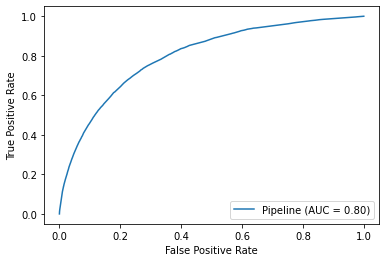

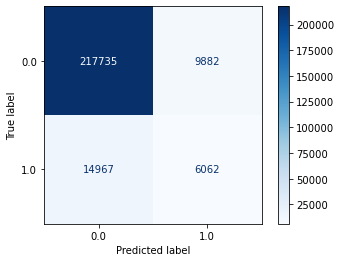

In [72]:
log_pca_cate_info.print_summary()

The pca logistic regression performed essentially the same as the logistic regression with no pca. The recall is 0.29 with the ROC-AUC score of 0.80.

### KNN

In [73]:
knn_cate = ImPipeline(steps=[
    ('ct', ct_categorical),
    ('sm', SMOTE(sampling_strategy= 0.25, random_state=1)),
    ('knn_cate',KNeighborsClassifier())
]).fit(X_categorical,y_categorical)

In [74]:
knn_cate_info = ModelWithCV(knn_cate, 'knn_cate', X_categorical, y_categorical)

 The recall on the training is 0.19582481335298874 
 CV Results for `knn_cate` model:
            0.15559 ± 0.00439 recall
         
 
 


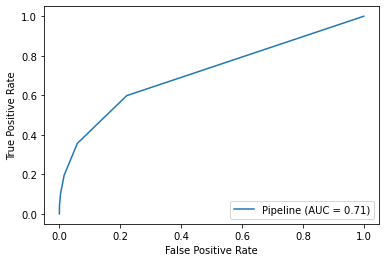

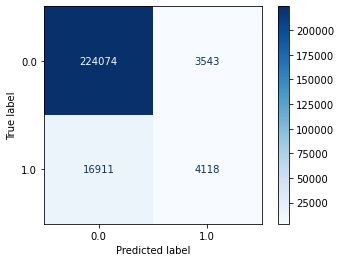

In [76]:
knn_cate_info.print_summary()

KNN performed worse than the logistic regression. Its recall is 0.2 compared to the logistic regression model of 0.29. The ROC-AUC is also worse at 0.71 compared to 0.80. However unlike it's only continuous counterpart, it this is nowhere near overfit as the cv recall is much closer with a 0.04 difference.

### Decision Tree/ RF

In [77]:
dtree_cate = ImPipeline(steps=[
    ('ct', ct_categorical),
    ('sm', SMOTE(sampling_strategy=0.25, random_state=1)),
    ('dtree', DecisionTreeClassifier(random_state=42) )
]).fit(X_categorical,y_categorical)

In [78]:
dtree_cate_info = ModelWithCV(dtree_cate, 'dtree_cate', X_categorical, y_categorical)

 The recall on the training is 0.2878881544533739 
 CV Results for `dtree_cate` model:
            0.18788 ± 0.00252 recall
         
 
 


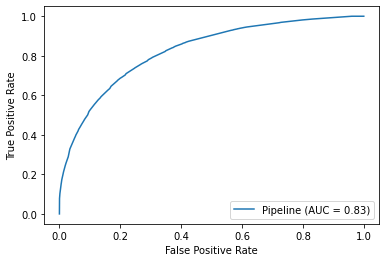

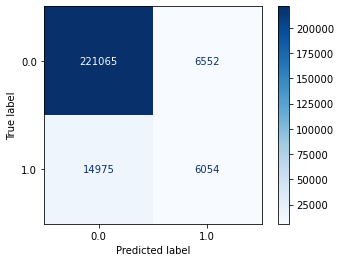

In [80]:
dtree_cate_info.print_summary()

The decision tree performs on par with the logistic regression with a recall score of 0.29 with a cv recall of 0.19, so it's slightly overfit but not too drastic. Its ROC-AUC score is slightly better than the logistic regression model by 0.03.

In [81]:
rf_cate = ImPipeline(steps=[
    ('ct', ct_categorical),
    ('sm', SMOTE(sampling_strategy=0.25, random_state=1)),
    ('rf_cate', RandomForestClassifier(random_state=42) )
]).fit(X_categorical,y_categorical)

In [82]:
rf_cate_info = ModelWithCV(rf_cate, 'rf_cate', X_categorical, y_categorical)

In [26]:
rf_cate_info = joblib.load('./joblib_models/rf_cate_info.sav')

 The recall on the training is 0.30700461267773077 
 CV Results for `rf_cate` model:
            0.20039 ± 0.00359 recall
         
 
 


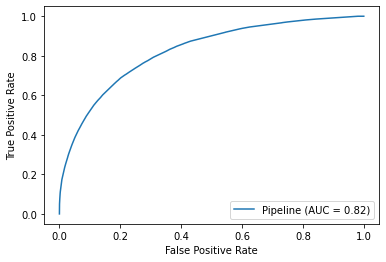

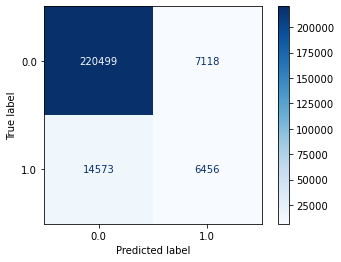

In [27]:
rf_cate_info.print_summary()

The random forest performed better than the decision tree/logistic regression by a very small margin. Its recall is 0.31 compared to 0.29. A 0.02 increase. Like all the other categorical models, it appears that this model is slightly overfit but not too extreme as the cv recall is 0.20 and the ROC-AUC is 0.82 which is not bad.

### XGBoost

In [85]:
xg_cate = ImPipeline(steps=[
    ('ct', ct_categorical),
    ('sm', SMOTE(sampling_strategy=0.25, random_state=1)),
    ('xg_cate', XGBClassifier(random_state= 42) )
]).fit(X_categorical,y_categorical)

In [86]:
xg_cate_info = ModelWithCV(xg_cate, 'xg_cate', X_categorical, y_categorical)

 The recall on the training is 0.2404298825431547 
 CV Results for `xg_cate` model:
            0.20039 ± 0.00489 recall
         
 
 


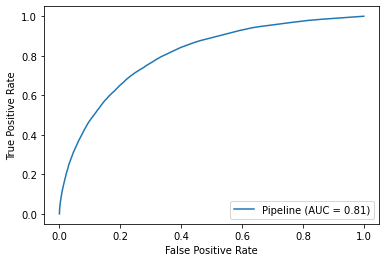

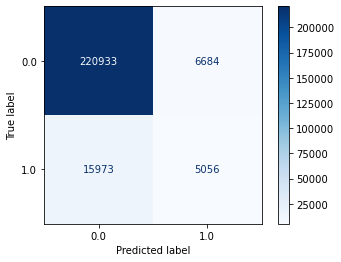

In [87]:
xg_cate_info.print_summary()

The XGBoost model performed with a recall 0.24 and cv recall of 0.20 with an ROC-AUC score of 0.81. While not the worse model, the recall score is still pretty bad.

### Gridsearch on the best model

In [89]:
rf_cate_params = {
    'rf_cate__n_estimators': [50,100,150],
    'rf_cate__criterion': ['gini', 'entropy'],
    'rf_cate__max_depth': [20,40,50]
}

In [90]:
rf_cate_gs = GridSearchCV(estimator=rf_cate, param_grid=rf_cate_params, n_jobs=-2,verbose=3,scoring='recall').fit(X_categorical,y_categorical)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done   2 tasks      | elapsed: 30.5min
[Parallel(n_jobs=-2)]: Done  90 out of  90 | elapsed: 186.8min finished


In [91]:
# rf_cate_gs = joblib.load('./joblib_models/rf_cate_gs.sav')

In [92]:
rf_cate_gs.best_estimator_

Pipeline(steps=[('ct',
                 ColumnTransformer(n_jobs=-2,
                                   transformers=[('cat',
                                                  Pipeline(steps=[('cat_impute',
                                                                   IterativeImputer(estimator=RandomForestClassifier(random_state=42),
                                                                                    max_iter=5,
                                                                                    random_state=42)),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['general_health',
                                                   'health_insurance', 'stroke',
                              

In [93]:
rf_cate_gs_info = ModelWithCV(rf_cate_gs.best_estimator_, 'rf_cate_gs', X_categorical, y_categorical)

 The recall on the training is 0.30524513766703126 
 CV Results for `rf_cate_gs` model:
            0.20053 ± 0.00310 recall
         
 
 


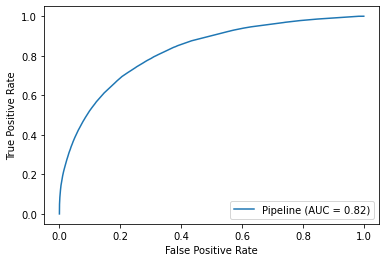

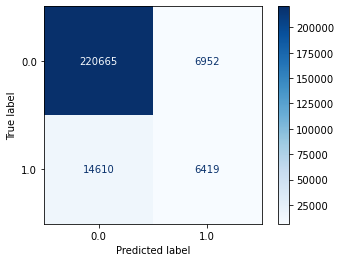

In [95]:
rf_cate_gs_info.print_summary()

Performs on par with the default random forest. The numbers are identical to each other. The recall for both is 0.31 with a cv recall of 0.20.

**Discussion**

The best model for with just categorical features is the random forest model with a recall of 0.31 and ROC-AUC of 0.82. It appears that our categorical models are less overfit to the training data. It's still better than just using a dummy's prediction as the models had a recall score that was greater than 0, but they are sub-par. Now, I will see how having all our continuous and categorical features will perform.

# Putting all our features into our model

In [97]:
dummy_all = ImPipeline(steps=[
    ('ct', ct),
    ('sm', SMOTE(sampling_strategy=0.25, random_state=1)),
    ('dummy', DummyClassifier(strategy='most_frequent'))
]).fit(X_train, y_train)

In [98]:
dummy_all_info = ModelWithCV(dummy_all, 'dummy_all', X_train, y_train)

 The recall on the training is 0.0 
 CV Results for `dummy_all` model:
            0.00000 ± 0.00000 recall
         
 
 


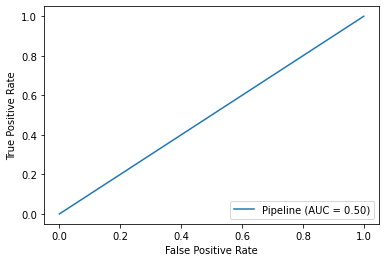

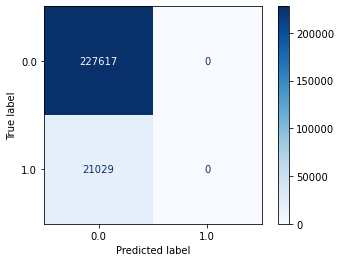

In [99]:
dummy_all_info.print_summary()

In [100]:
#ended up not doing a logistic regression pca for this section due to computational power

# dummy_all_pca = ImPipeline(steps=[
#     ('ct', ct),
#     ('sm', SMOTE(sampling_strategy=0.25, random_state=1)),
#     ('pca', PCA()),
#     ('dummy', DummyClassifier(strategy='most_frequent'))
# ]).fit(X_train, y_train)

In [101]:
# dummy_all_pca_info = ModelWithCV(dummy_all_pca, 'dummy_all_pca', X_train, y_train)

In [102]:
# dummy_all_pca_info.print_summary()

### Logistic Model

In [103]:
log2 = ImPipeline(steps=[
    ('ct', ct),
    ('sm', SMOTE(sampling_strategy= 0.25, random_state=1, n_jobs=-2)),
    ('log2',LogisticRegression(random_state=42, n_jobs= -2))
]).fit(X_train, y_train)

In [21]:
#load information without needing to run it
# log2 = joblib.load('./joblib_models/log2.sav')

In [105]:
log2_info = ModelWithCV(log2, 'log2', X_train, y_train)

C:\Users\xiao\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\xiao\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

 The recall on the training is 0.2992534119549194 
 CV Results for `log2` model:
            0.29821 ± 0.00330 recall
         
 
 


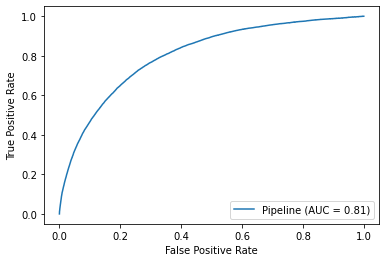

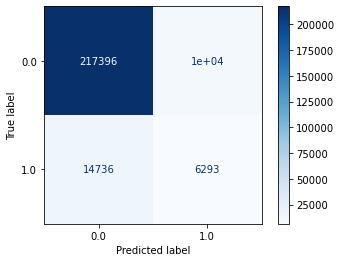

In [107]:
log2_info.print_summary()

The default logistic regression performed better than the dummy in terms of recall, ~0.30 versus 0.0. It's cv recall is ~0.3 as well, meaning this model is not over fit. Its ROC-AUC is 0.81 which is higher than the dummy of 0.50.

### KNN

In [108]:
knn2 = ImPipeline(steps=[
    ('ct', ct),
    ('sm', SMOTE(sampling_strategy= 0.25, random_state=1)),
    ('knn2',KNeighborsClassifier())
]).fit(X_train, y_train)

In [22]:
knn2 = joblib.dump('./knn2.sav')

In [110]:
knn2_info = ModelWithCV(knn2, 'knn2', X_train, y_train)

 The recall on the training is 0.6542393837082124 
 CV Results for `knn2` model:
            0.29797 ± 0.00650 recall
         
 
 


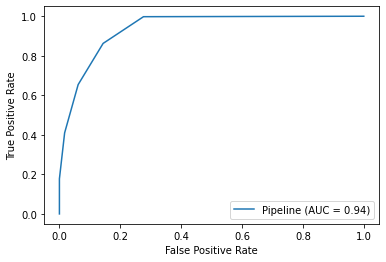

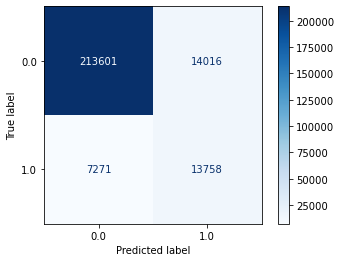

In [112]:
knn2_info.print_summary()

This model looks very promising. The recall for this KNN is much better than our logistic model, which is better than our dummy. It has a recall of 0.65 versus the logistic model's of 0.30. Its ROC-AUC score is also higher than the logistic model of 0.94 versus 0.81. However, it's cv recall is 0.30 which indicates that it's overfit unlike the logistic regression model.

### Decision Tree

In [113]:
dtree2 = ImPipeline(steps=[
    ('ct', ct),
    ('sm', SMOTE(sampling_strategy=0.25, random_state=1)),
    ('dtree2', DecisionTreeClassifier(random_state=42) )
]).fit(X_train, y_train)

In [115]:
dtree2_info = ModelWithCV(dtree2, 'dtree2', X_train, y_train)

 The recall on the training is 0.9689951971087546 
 CV Results for `dtree2` model:
            0.25065 ± 0.00421 recall
         
 
 


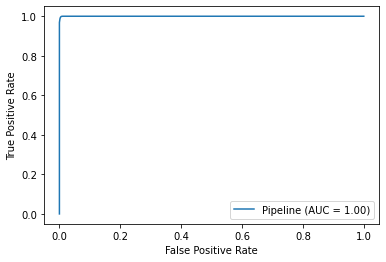

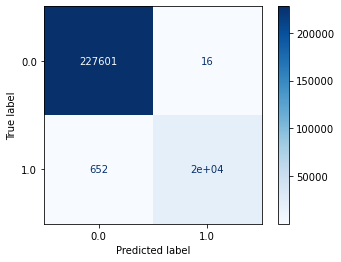

In [117]:
dtree2_info.print_summary()

This decision tree has even better recall than the KNN model. Its recall is 0.97 compared to the KNN of 0.65.  However, this model is over fit. It has a ROC-AUC score of 1.0 which is a big indicator of being over fit to our training data. Not only that, the cv recall is so much lower being at 0.25 compared to the recall on the entire training.

### Random forest

In [118]:
rf2 = ImPipeline(steps=[
    ('ct', ct),
    ('sm', SMOTE(sampling_strategy=0.25, random_state=1)),
    ('rf', RandomForestClassifier(random_state=42) )
]).fit(X_train, y_train)

In [120]:
rf2_info = ModelWithCV(rf2, 'rf2', X_train, y_train)

 The recall on the training is 0.9713253126634648 
 CV Results for `rf2` model:
            0.14509 ± 0.00210 recall
         
 
 


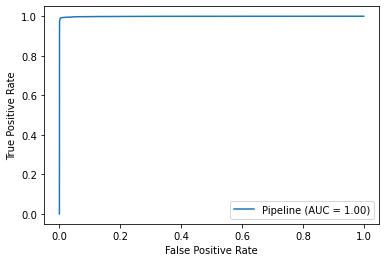

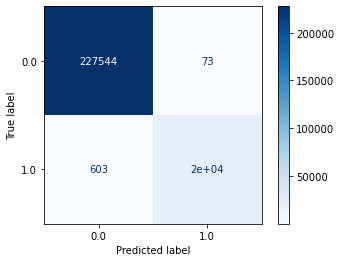

In [122]:
rf2_info.print_summary()

This random forest model performed about the same as the decision tree in terms of recall; both having a recall of 0.97. Like the decision tree though, this model is also over fit as indicated with it's ROC-AUC score of 1.0. It's cv recall 0.15 is also really low compared to its recall score.

### XGBoost

In [123]:
xg2 = ImPipeline(steps=[
    ('ct', ct),
    ('sm', SMOTE(sampling_strategy=0.25, random_state=1)),
    ('xg2', XGBClassifier(random_state= 42) )
]).fit(X_train, y_train)

In [18]:
xg2_info = ModelWithCV(xg2, 'xg2', X_train, y_train)

 The recall on the training is 0.1214037757382662 
 CV Results for `xg2` model:
            0.09806 ± 0.00319 recall
         
 
 


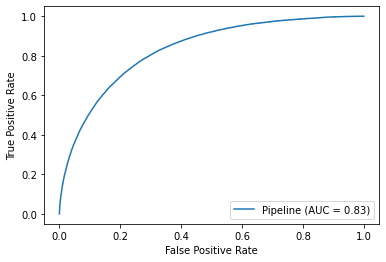

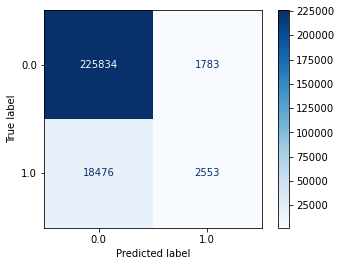

In [20]:
xg2_info.print_summary()

The XGBoost model performed better than our dummy in terms of recall, having a recall of 0.12 compared to 0.00. Its cv recall is 0.10, so it's not over fit. However, it performed the worse out of all the other models in terms of recall. The ROC-AUC score is good at 0.83 but that is not our main metric and more for finding over fitness in our model along with the cv recall.

**Due to the computational power required to run a grid search on the categorical portion of the data (31 GB at times), I will not be running a grid search on the best model of this section as my computer is limited to 32 GB memory. These model in this section contains not only the categorical portion but also the continuous portion.**

**Discussion**

The best model for this section that included all the features was random forest and decision tree, with KNN being the third-best model. The problem with random forest and decision tree is that they are over fit as their ROC-AUC is 1.0. This is a big indicator of over fitness. The KNN could possibly be over fit as well since it has a ROC-AUC of 0.94 but the recall score is about 0.64. It is just not as over fit as the random forest and decision tree. When looking at all the models, it appears that having both the categorical and continuous helped with the recall. As the best recall came from this section. As such, I will take the KNN model as our best model.

# Model Evaluations

In [13]:
def test_information(model,X,y):
    preds = model.predict(X)
    recall = recall_score(y, preds)
    print(f" The model's recall is {recall} \n \n {plot_roc_curve(model, X,y)} \n \n "
          f"{plot_confusion_matrix(model, X, y, cmap=plt.cm.Blues)}")

 The model's recall is 0.2940505064916536 
 
 


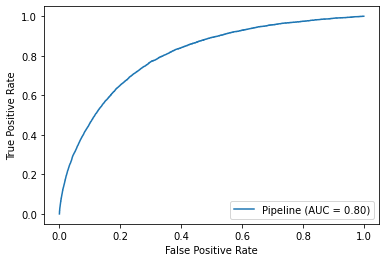

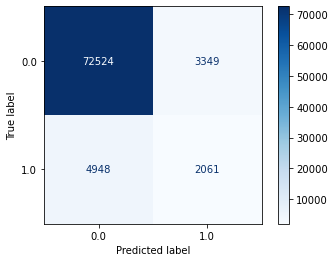

In [25]:
test_information(log2, X_test, y_test)

 The model's recall is 0.30346697103723785 
 
 


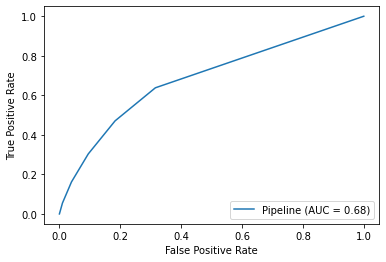

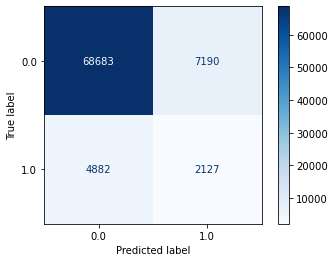

In [26]:
test_information(knn2,X_test,y_test)

 The model's recall is 0.2461121415323156 
 
 


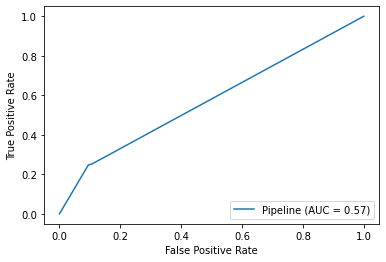

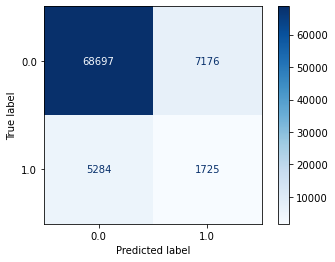

In [17]:
test_information(dtree2,X_test,y_test)

 The model's recall is 0.14752461121415322 
 
 


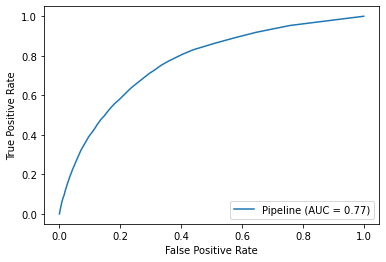

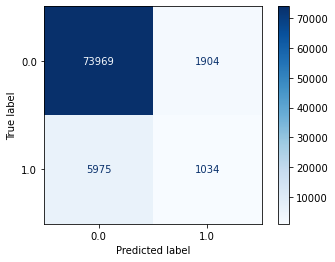

In [18]:
test_information(rf2,X_test, y_test)

 The model's recall is 0.09031245541446711 
 
 


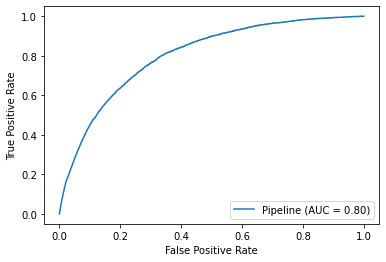

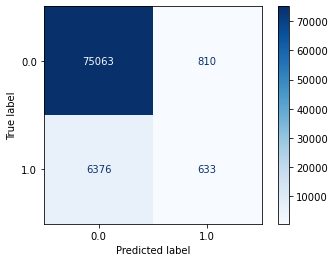

In [21]:
test_information(xg2, X_test, y_test)

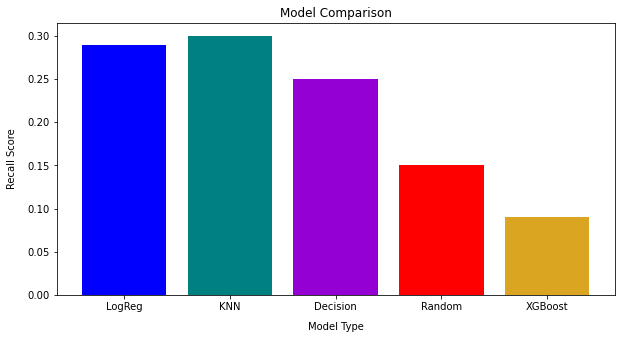

In [22]:
x = ['LogReg', 'KNN', 'Decision', 'Random', 'XGBoost']
y = [0.29,0.30,0.25,0.15,0.09]
plt.figure(figsize=(10,5))
plt.bar( x = x, height=y, color = ['blue', 'teal', 'darkviolet', 'red', 'goldenrod'] )
plt.title('Model Comparison')
plt.ylabel('Recall Score', labelpad=10)
plt.xlabel('Model Type', labelpad= 10)

plt.savefig('./Images/model_comp.png', dpi = 300)

**Discussion**
It appears that the KNN model performs best at unseen data. The logistic regression is a close second with 0.29. While this recall score is not ideal, I will accept the KNN model or the logistic regression as my best model. For the app, I will deploy either the KNN or logistic regression one depending on how fast the results are returned since they performed relatively the same in terms of identifying who actually has heart disease and mis-classifying them.

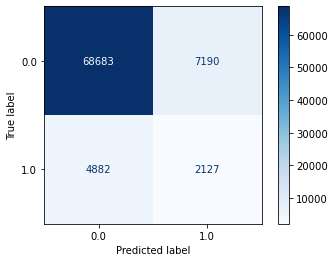

In [25]:
plot_confusion_matrix(knn2,X_test,y_test, cmap=plt.cm.Blues)
plt.savefig('./confusion_matrix.png')

# App

The app used the logistic regression model because it ran faster and its recall is comparable to the KNN model.

Our best model was deployed in an app. The function development in the [app.py](./app.py) file can be found in the app development notebook. In addition, the code used to make the app on streamlit can be found in the app.py. Unfortunately, due to how big the model file is (4 Gb), I was unable to implement my model on the streamlit website, but managed to run it locally. As such, it is not available for others to use. In my GitHub, I have provided the streamlit environment in which I created it. This app can be run locally with the streamlit environment along with running the modeling notebook in order to get the model file into your local computer.

# Next Steps

The next step for this project would be to further refine our target. This projects only looks at heart attack and Coronary Artery Disease. These two conditions are some conditions that fall under the heart disease. Heart disease encompasses other conditions such as high blood pressure, congenital heart disease etc., it's not just CAD and heart attacks as such we would have to refine the questions being asked individual.

Not only that but more time to refine our model. Due to computational limitation of my system and the computational time, I am not able to perform as much grid-searches to fine-tune the model even further. Not only that but we can refine our model on data from patients' information form and the diagnoses given by the doctor to help improve the flagging of individuals with such a condition that way their primary doctor know to discuss this with the patient.

Build a better app. The app created was for demonstrated purposes but can be made so that instead of having to fill in the information manually, it can capture the information from a picture of the history form from a patient.

# Conclusion

In conclusion, my model is able to predict whether someone has heart disease or not. Further refinement can by including from the patient's health form to see if that helps with identifying these individuals better. Not only that, but expanding what falls under heart disease as this project really only looks at coronary heart disease and heart attacks, when in reality there's other condition that fall under this umbrella. Finally, a better app can be made that is able to capture information from the patient history information paperwork as such nurse/health care receptionist does not need to manually fill this information on.

This model can be deployed in an app to be used in a hospital to flag a doctor on an individual. By being able to flag an individual as having heart disease, the doctor can start potentially asking other questions to the individual and do further test to confirm. But what is key, here is that a conversation with the doctor can begin and early intervention can occur. By talking about the heart health and ways to manage such a disease and other prevention, even if it's a misdiagnosis, the individual is now aware of this and can if they choose so start taking either preventative measures or start managing this disease. This is in hopes that we can keep the individual healthy and prevent early death due to this disease. Not only that, but some heart disease can be prevented by changing habits and behaviors. Thus, my model will identify these individual for the doctor when they fill out their health form.

# References

CDC. "*Heart Disease Facts*". CDC. Feb 2022.[Link](https://www.cdc.gov/heartdisease/facts.htm)

CDC. "*About Heart Disease*". CDC. Sept 2021. [Link](https://www.cdc.gov/heartdisease/about.htm)

AHA. "*CDC Prevention Programs*". AHA. May 2018. [Link](https://www.heart.org/en/get-involved/advocate/federal-priorities/cdc-prevention-programs)